In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
import matplotlib as mpl
!rm ~/.cache/matplotlib -rf

Password:
sudo: a password is required
Password:
sudo: a password is required
rm: /Users/sola/.cache/matplotlib: No such file or directory
rm: -rf: No such file or directory


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

In [14]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
data.tail()

,Sepal length,Sepal width,Petal length,Petal width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## 2개 항목만 이용해서 분석

In [16]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
..            ...          ...      ...
145           6.7          3.0        1
146           6.3          2.5        2
147           6.5          3.0        1
148           6.2          3.4        1
149           5.9          3.0        2

[150 rows x 3 columns]


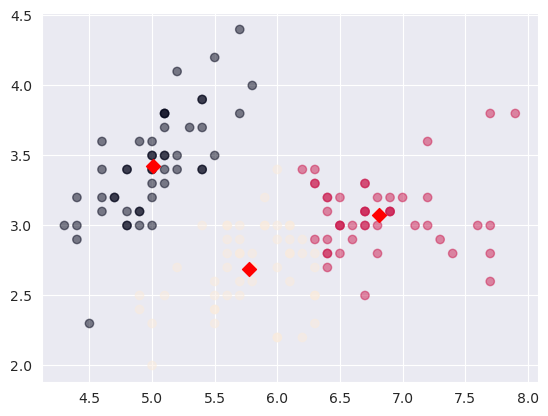

In [18]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [19]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0        50   0   0
1         0  12  38
2         0  35  15


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
#데이터가 물흐르듯이 이어주는것이 pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

#결과가 이상해짐...

predict   0   1   2
labels             
0         1  49   0
1        36   1  13
2        20   0  30


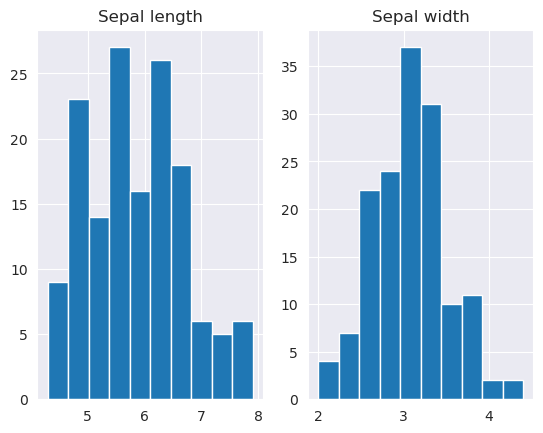

In [21]:
import matplotlib.pyplot  as plt

plt.subplot(1,2,1)
plt.hist(data['Sepal length'])
plt.title('Sepal length')
plt.subplot(1,2,2)
plt.hist(data['Sepal width'])
plt.title('Sepal width')
plt.show()

/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canv

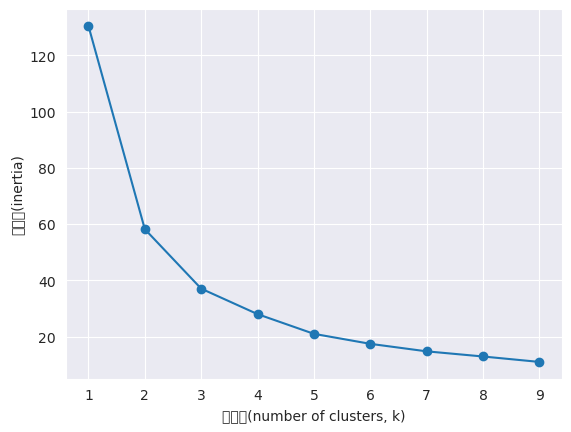

In [22]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('군집수(number of clusters, k)')
plt.ylabel('관성값(inertia)')
plt.xticks(ks)
plt.show()


# 계층적 군집화 모델(Hierachical clustering)

/Users/sola/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


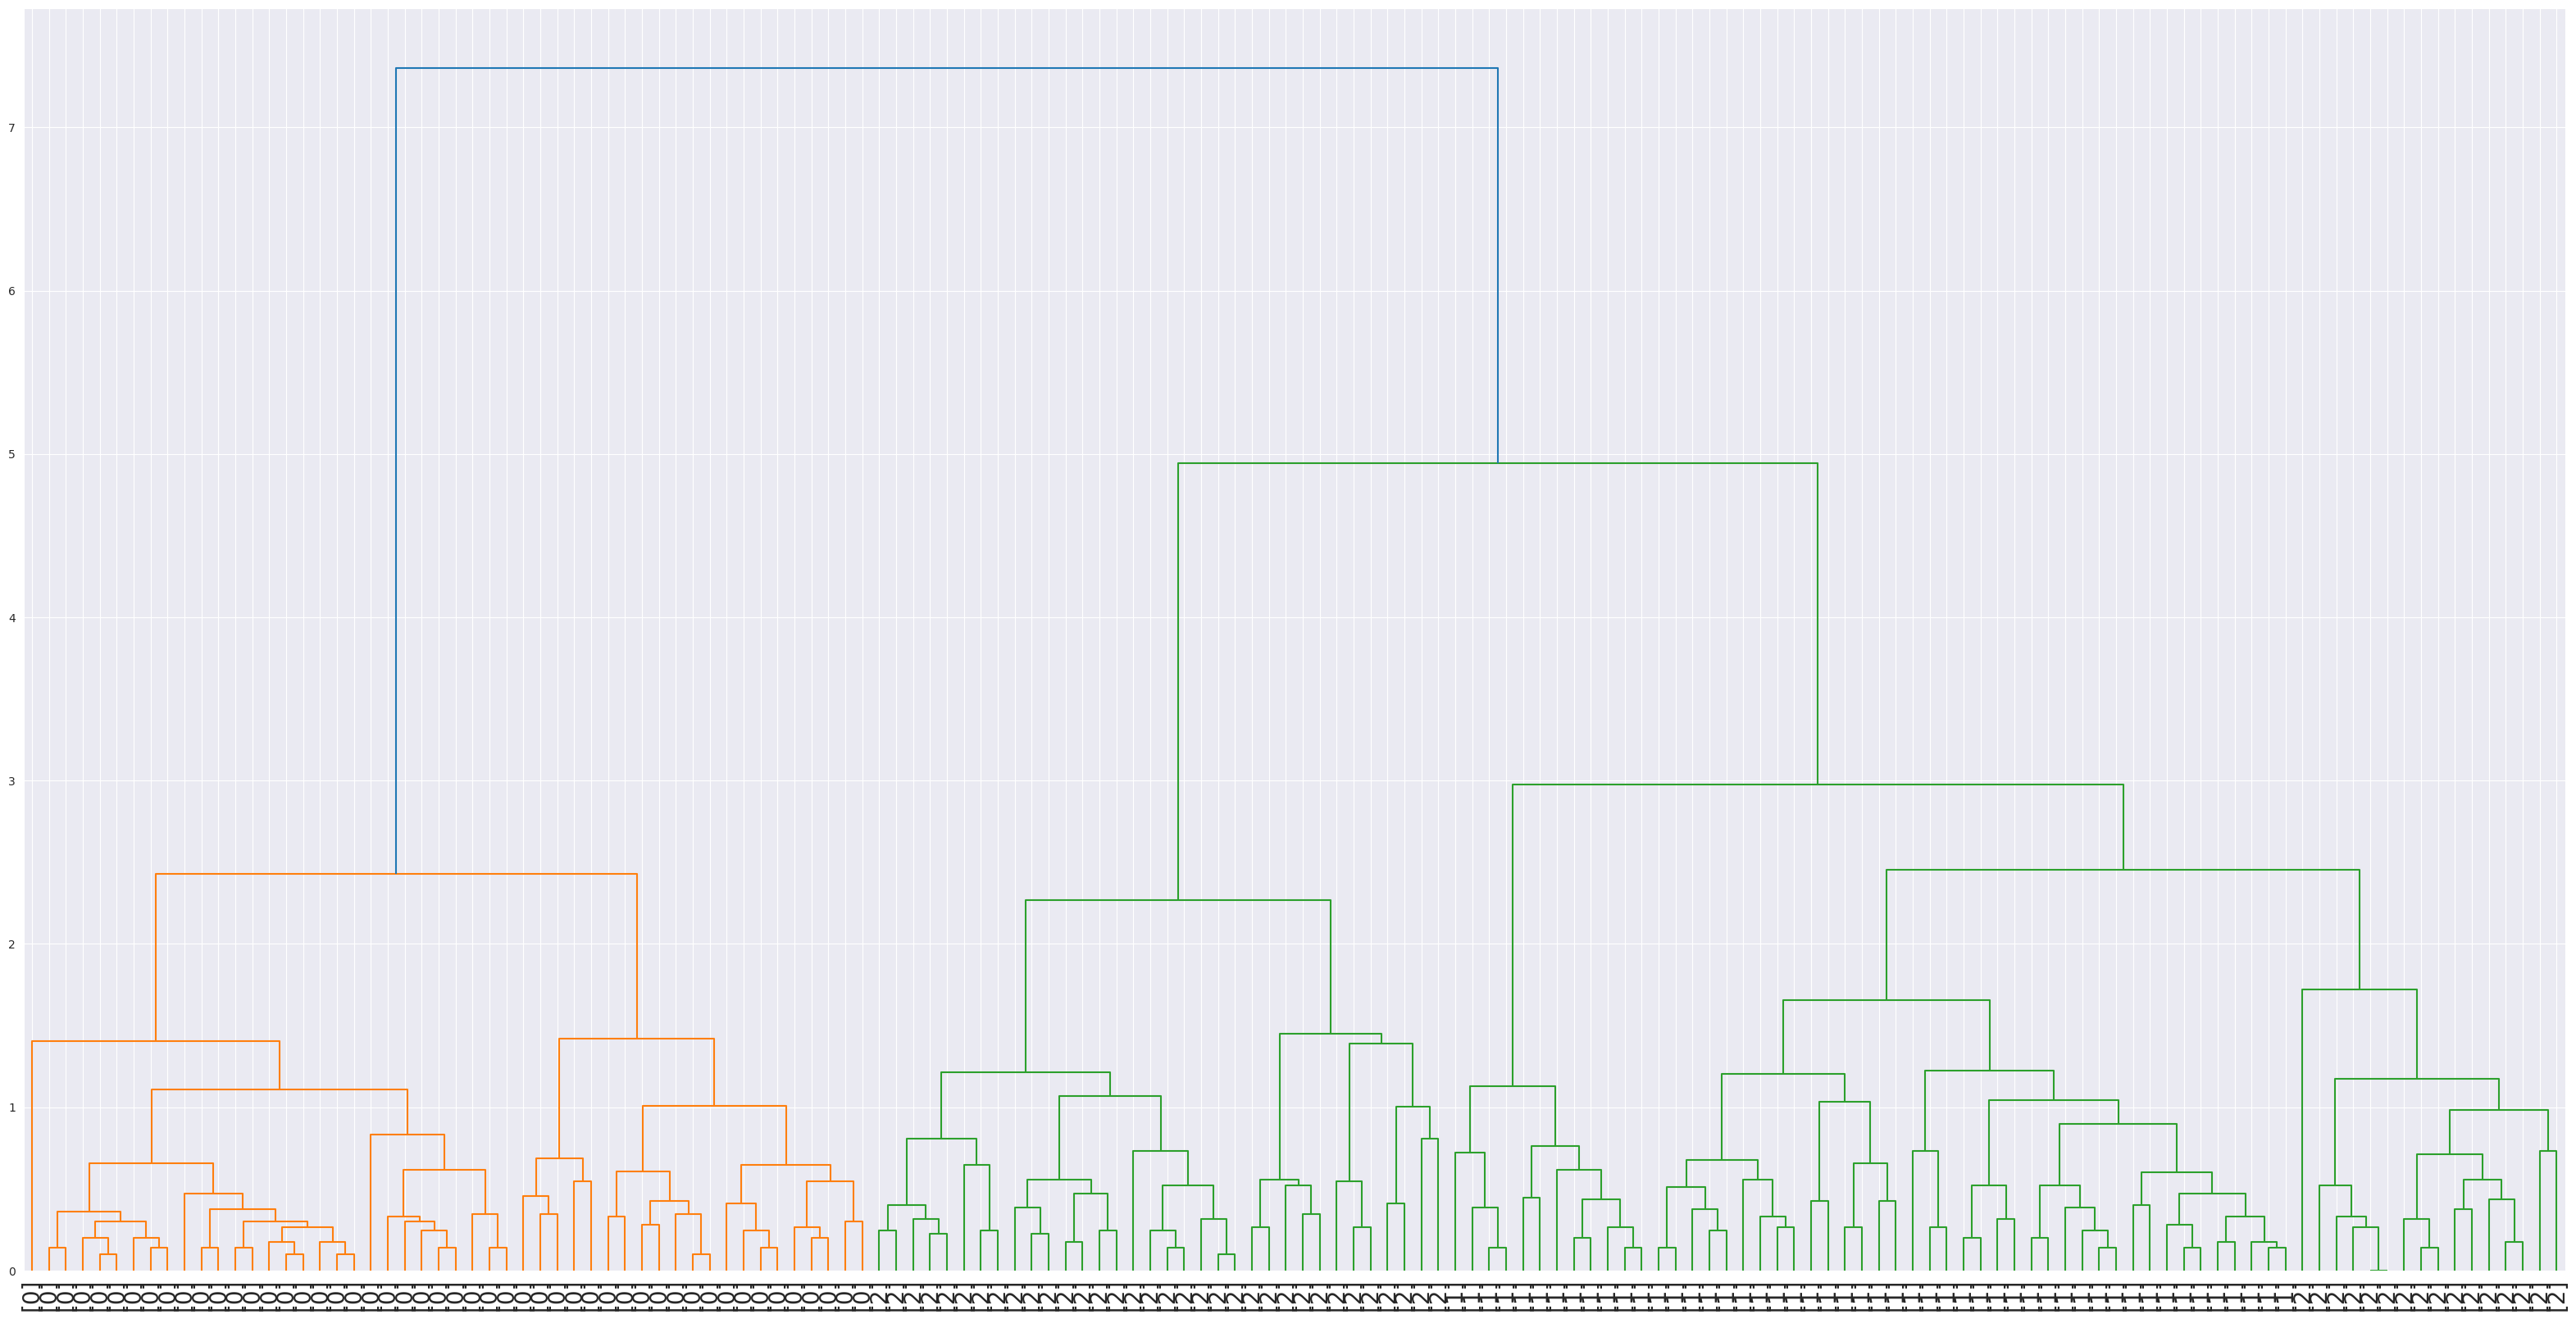

In [23]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram #수형도
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.values,
           leaf_rotation=90,
           leaf_font_size=20,
);
plt.show();

## 4개 항목 모두 활용해서 분석 (과제)

In [24]:
#위에꺼 복붙해서...ㄱㄱ 컬럼 4개를 다 활용해서 해보라는뜻....?

from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
data.tail()

,Sepal length,Sepal width,Petal length,Petal width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [26]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


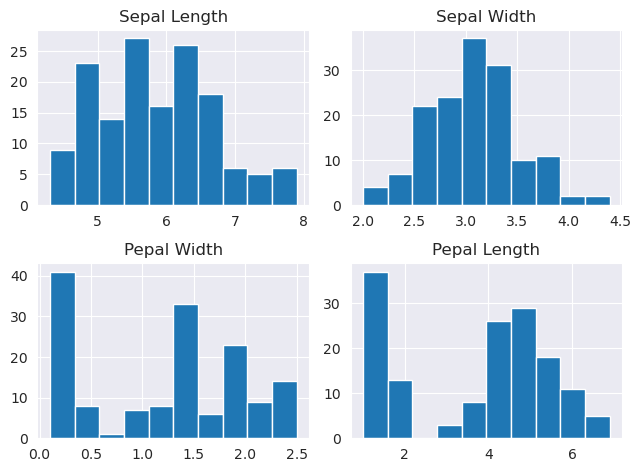

In [27]:
import matplotlib.pyplot as plt

n_bins = 10
fig, axs = plt.subplots(2, 2) # 그래프를 그리기 위해 일종의 레이아웃을 작성
axs[0, 0].hist(feature['Sepal length'], bins = n_bins);
axs[0, 0].set_title('Sepal Length');
axs[0, 1].hist(feature['Sepal width'], bins = n_bins);
axs[0, 1].set_title('Sepal Width');
axs[1, 0].hist(feature['Petal width'], bins = n_bins);
axs[1, 0].set_title('Pepal Width');
axs[1, 1].hist(feature['Petal length'], bins = n_bins);
axs[1, 1].set_title('Pepal Length');

fig.tight_layout(pad=1.0);

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

r

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


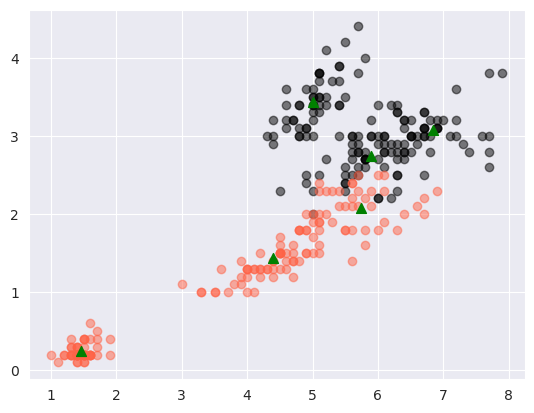

In [29]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width','Petal length','Petal width'])
center_x = centers['Sepal length'], centers['Petal length'] 
center_y = centers['Sepal width'], centers['Petal width'] 

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'], color='k',alpha=0.5)
plt.scatter(r['Petal length'],r['Petal width'],color='tomato',alpha=0.5)

plt.scatter(center_x,center_y,s=50,marker='^',c='g')
plt.show()

In [91]:
from sklearn.datasets import load_iris
from sklearn import metrics
import numpy as np
k = 3
iris = load_iris()
kmeans = KMeans(n_clusters=k)
kmeans.fit(iris.data, iris.target)
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}
X=[[4, 3, 3.2, 2.2]]

y = kmeans.predict(X)

y_pred_all_kmean = kmeans.predict(iris.data)
y_pred_all_kmean = np.mod(y_pred_all_kmean + 2, 3)

scores = metrics.accuracy_score(iris.target, y_pred_all_kmean) #=>알스퀘어 값을 구하는 식
print('n_clusters가 {0:d}일때 정확도: {1:.4f}'.format(k, scores))

n_clusters가 3일때 정확도: 0.3200


In [30]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0        50   0   0
1         0   2  48
2         0  36  14


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
#데이터가 물흐르듯이 이어주는것이 pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']



# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

#결과가 이상해짐...

predict   0   1   2
labels             
0         0  50   0
1        11   0  39
2        36   0  14


/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sola/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canv

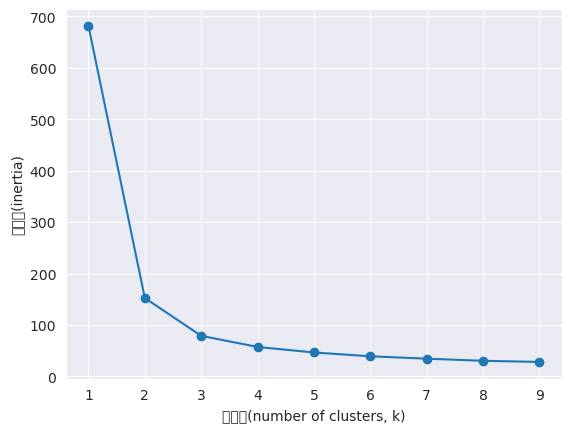

In [33]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('군집수(number of clusters, k)')
plt.ylabel('관성값(inertia)')
plt.xticks(ks)
plt.show()

n_clusters가 3일때 정확도: 0.2400
n_clusters가 3일때 정확도: 0.0133


## 더 읽을거리
* [군집화 평가방법](https://ratsgo.github.io/machine%20learning/2017/04/16/clustering/)

In [36]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(feature)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)